## Requirements

In [85]:
import sympy
from sympy import init_printing, symbols
from sympy import cos, sin, Derivative, pi

init_printing()

## Simple pendulum

We want to describe a pendulum suspended from the origin with a length $l$ and a mass $m$, subject to gravity (gravitational accelleration $g$).  The angle the pendulum makes with the $Y$-axis is $\theta(t)$ where $t$ is the time.
![simple pendulum](img/pendulum.gif)

In [24]:
t, l, g, m = symbols('t l g m', real=True, positive=True)

$\theta$ is a function of $t$, this can be defined explicitely as follows.

In [19]:
theta = symbols(r'\theta', cls=sympy.Function)
theta = theta(t)

The $x$ and $y$ coordinates can be expressed as a function of $theta$:

In [25]:
x = l*sin(theta)
y = -l*cos(theta)
x, y

We can now express the kinetic and potential energy in function of $x$ and $y$.  The kinetic energy is given by:
$$
    T = \frac{1}{2} m (v_x^2 + v_y^2)
$$
and the potential energy by:
$$
    U = m g y
$$
The Langragian is $L = T - U$.

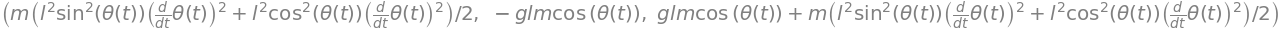

In [26]:
T = m*(x.diff(t)**2 + y.diff(t)**2)/2
U = m*g*y
L = T - U
T, U, L

For convenience, we define $\dot{\theta}(t) = \frac{d \theta}{d t}(t)$ and $\ddot{\theta} = \frac{d \dot{\theta}}{d t}(t)$.

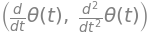

In [27]:
theta_dot = theta.diff(t)
theta_dot_dot = theta_dot.diff(t)
theta_dot, theta_dot_dot

Now we can formulate the Euler-Lagrange equation:
$$
    \frac{\partial L}{\partial \theta} - \frac{d}{d t} \frac{\partial L}{\partial \dot{\theta}} = 0
$$

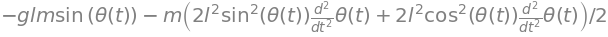

In [46]:
EL_eq = L.diff(theta) - L.diff(theta_dot).diff(t)
EL_eq

Now we can solve for $\ddot{\theta}(t)$, which gives us the differential equation for the motion of the pendulum.

In [47]:
rhs = sympy.solve(EL_eq, theta_dot_dot)[0]
rhs

Now we have the second order ordinary differential equation that we can solve for $\theta(t)$:
$$
    \ddot{\theta}(t) = - \frac{g}{l} \sin \theta(t)
$$

However, this equation is not linear, and no analytic solution is known.  We can either solve it numerically, or approximate the solution for small values of $\theta(t)$ by a Taylor series expansion to first order.

In [54]:
x = symbols('x')
lin_rhs = rhs.subs(theta, x) \
    .series(x, 0, n=2).removeO() \
    .subs(x, theta)

Note that we need to fiddle a bit since the `series` method doesn't work when the variable we want to do the series expansion in is a function.  Hence we substitute $x$ for $\theta(t)$, do the series expansion to second order, drop the $O(x^2)$ term and substitute $\theta(t)$ back in for $x$.

Now we can solve the second order ordinary differential equation analytically, and we obtain the well-known solution.

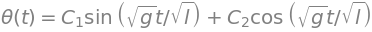

In [56]:
solution = sympy.dsolve(Derivative(theta, t, t) - lin_rhs, theta)
solution

$C_1$ and $C_2$ can be determined by imposing initial conditions on $\theta(0)$ and $\dot{\theta}(0)$.
$$
    \begin{cases}
        \theta(0) = \theta_0 \\
        \dot{\theta}(0) = \omega_0
    \end{cases}
$$


In [68]:
theta_0 = symbols(r'\theta_0', real=True)
omega_0 = symbols(r'\omega_0', real=True)

First we get the symbols for $C_1$ and $C_2$ in the solution using `epath`.

In [67]:
C_1 = sympy.epath('/[0]/[0]', solution.rhs)[0]
C_2 = sympy.epath('/[1]/[0]', solution.rhs)[0]
C_1, C_2

Next, we can solve for $C_2$ using the expression for $\theta(0)$:

In [75]:
C_sols = sympy.solve(solution.rhs.subs(t, 0) - theta_0, C_2, dict=True)[0]
C_sols

Subsequently, we can solve for $C_1$ using the expression for $\dot{\theta}(0)$:

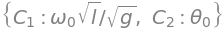

In [76]:
C_sols.update(sympy.solve(solution.rhs.diff(t).subs(t, 0) - omega_0, C_1, dict=True)[0])
C_sols

We obtain the final solution by substituting the values of $C_1$ and $C_2$ into the original solution.

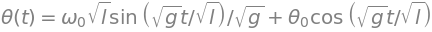

In [78]:
final_solution = solution.subs(C_sols)
final_solution

We can now plot the solution for $l = g = 9.81$, and an initial angle $\theta = 0.1$ and angular velocity $\omega_0 = 0.05$.

In [80]:
values = {
    l: 9.81,
    g: 9.81,
    theta_0: 0.1,
    omega_0: 0.05,
}

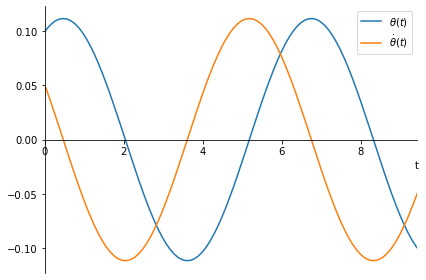

In [99]:
plot = sympy.plot(final_solution.rhs.subs(values),\
                  final_solution.rhs.diff(t).subs(values),
                  xlim=(0.0, 3*pi),
                  ylabel=None,
                  adaptive=False, nb_of_points=200,
                  show=False)
plot[0].label = r'$\theta(t)$'
plot[1].label = r'$\dot{\theta}(t)$'
plot.legend = True
plot.show()